In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.manifold import TSNE

#### (1) Convolution function

In [6]:
def hw2q3Replication_padding(channel, width, height, kernel_width, kernel_height, padding_width, padding_height, img):
    input = np.zeros((width + padding_width, height + padding_height, channel), float)
    for i in range(width):
        for j in range(height):
            for c in range(channel):
                input[i + int((padding_width)/2)][j + int((padding_height)/2)][c] = img[i][j][c]
    for i in range(0, int((padding_width)/2)):
        for j in range(int((padding_height)/2), height + int((padding_height)/2)):
            for c in range(channel):
                input[i][j][c] = input[padding_width - 1 - i][j][c]
                input[width + padding_width - 1 - i][j] = input[width + i][j] 
    for i in range(0, width + padding_width):
        for j in range(0, int((padding_height)/2)):
            for c in range(channel):
                input[i][j][c] = input[i][padding_height - 1 - j][c]
                input[i][height + padding_height - 1 - j] = input[i][height + j]
    return input

def hw3q1Striding(width, height, kernel_width, kernel_height, padding_width, padding_height, stride_width, stride_height, conv_output):
    output = np.zeros((int((width - kernel_width + padding_width + stride_width)/stride_width), int((height - kernel_height + padding_height + stride_height)/stride_height)), float)
    k=0
    i=0
    while(i >= 0 and i < (width - kernel_width + padding_width + 1) and k >= 0 and k < (int((width - kernel_width + padding_width + stride_width)/stride_width))):
        l = 0
        j = 0
        while(j >= 0 and j < (height - kernel_height + padding_height + 1) and l >= 0 and l < (int((height - kernel_height + padding_height + stride_height)/stride_height)) ):
            output[k][l] = conv_output[i][j]
            j = j + stride_height
            l = l + 1
        i = i + stride_width
        k = k + 1
    return output

def sigmoid(z):
    sig = (1.0/(1+np.exp(-z)))
    return sig

def tanh(z):
    return np.tanh(z)

def ReLU(z):
    return max(0, z)

def PReLU(z, alpha):
    return max(0, z) + alpha * min(0, z)

In [7]:
def hw3q1Convolution(img, kernel, stride, padding, nl_func, alpha=0):
    width = img.shape[0]
    height = img.shape[1]
    channel = img.shape[2]
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    padding_width = padding[0]
    padding_height = padding[1]
    stride_width = stride[0]
    stride_height = stride[1]
    input = hw2q3Replication_padding(channel, width, height, kernel_width, kernel_height,padding_width, padding_height, img)
    conv_output = np.zeros((width  + padding_width , height + padding_height), int)
    for i in range(int((kernel_width-1)/2), width + padding_width - int((kernel_width-1)/2) ):
        for j in range(int((kernel_height-1)/2), height + padding_height - int((kernel_height-1)/2)):
            for c in range(channel):
                for k in range(-int((kernel_width - 1)/2), int((kernel_width - 1)/2) + 1):
                    for l in range(-int((kernel_height - 1)/2), int((kernel_height - 1)/2) + 1):
                        #if (i - k) >= 0 and (i - k) < (width - kernel_width + padding_width + 1) and (j - l) >= 0 and (j - l) < (height - kernel_height + padding_height + 1):
                        conv_output[i][j] += input[i - k][j - l][c] * kernel[int((kernel_width - 1)/2) + k][int((kernel_height - 1)/2)+ l][c]
    #print(conv_output)
    conv_output = conv_output[int((kernel_width - 1)/2):int(width + padding_width - int((kernel_width - 1)/2)), int((kernel_height - 1)/2):int(height + padding_height - int((kernel_height - 1)/2))].astype(float)
    #print(conv_output)
    output_temp = hw3q1Striding(width, height, kernel_width, kernel_height, padding_width, padding_height, stride_width, stride_height, conv_output)
    #output_temp = (255*(output_temp - np.min(output_temp))/np.ptp(output_temp)).astype(float)
    for i in range(int((width - kernel_width + padding_width + stride_width)/stride_width)):
        for j in range(int((height - kernel_height + padding_height + stride_height)/stride_height)):
            if nl_func == 'sigmoid':
                output_temp[i][j] = sigmoid(output_temp[i][j])
            elif nl_func == 'tanh':
                output_temp[i][j] = tanh(output_temp[i][j])
            elif nl_func == 'ReLU':
                output_temp[i][j] = ReLU(output_temp[i][j])
            elif nl_func == 'PReLU':
                output_temp[i][j] = PReLU(output_temp[i][j], alpha)
    #print(output_temp)
    return output_temp

original image size :  (32, 32, 3)
original image


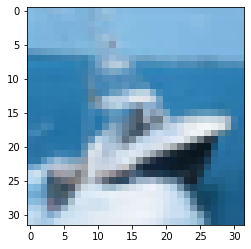

Filter Kernel size:  (3, 3, 3)
Filter Kernel:  [[[ 1.15122785  1.25251741 -0.82659622]
  [ 1.79283945  0.32698139  0.28780508]
  [-0.20200279 -0.60236523  1.90666786]]

 [[ 1.87559069 -1.88755023 -0.18307925]
  [ 0.1259105  -0.21768478  0.57054341]
  [ 1.36348099 -0.78338889 -0.13257571]]

 [[-0.9886668   0.19944381  0.15124998]
  [ 0.2117279  -0.42006015 -0.06078882]
  [-1.74221145 -0.11504206 -0.32900527]]]
activation map after sigmoid size :  (17, 17)
activation map after sigmoid


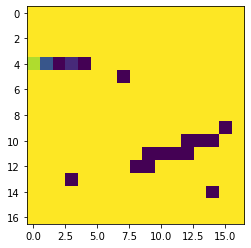

activation map after tanh size :  (17, 17)
activation map after tanh


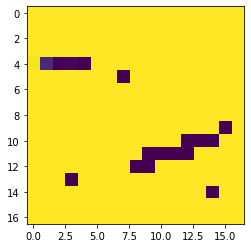

activation map after ReLU size :  (17, 17)
activation map after ReLU


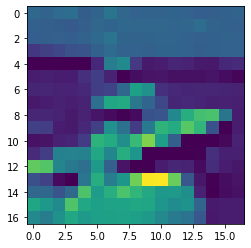

activation map after PReLU size :  (17, 17)
activation map after PReLU


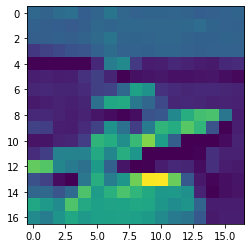

In [8]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def ImageMatrix(dictionary, image_number):
    data = dictionary[b'data']
    image_width = 32
    image_height = 32
    channel = 3
    image = np.zeros((image_width, image_height, channel), int)
    for i in range(image_width):
        for j in range(image_height):
            for c in range(channel):
                #print(i, j, c, i*32 + j + c*1024)
                image[i][j][c] = data[image_number][i*32 + j + c*1024]
    return image

dictionary = unpickle('cifar-10-batches-py\data_batch_1')
image = ImageMatrix(dictionary, 8)
#print(image.shape)
print("original image size : ", image.shape)
print("original image")
plt.imshow(image)
plt.show()

kernel1 = np.random.randn(3,3,3)
#kernel1 = np.array([[[165, 204, 214], [132, 179, 193], [110, 159, 187]], [[166, 202, 217], [165, 200, 217], [163, 198, 215]], [[162, 199, 215], [161, 198, 216], [161, 199, 214]]])
#kernel1 = np.array([[[12, 32, 40], [55, 10, 11], [200, 13, 17]], [[66, 34, 28], [99, 100, 130], [80, 85, 95]], [[105, 115, 215], [161, 201, 15], [77, 80, 14]]])
print("Filter Kernel size: ", kernel1.shape)
print("Filter Kernel: ", kernel1)

#plt.imshow(kernel1)
#plt.show()
#image1 = np.array([[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15], [16,17,18,19,20], [21,22,23,24,25]])
#image1 = image1.reshape((image1.shape[0], image1.shape[1], 1))

stride = np.array([2,2])
padding = np.array([4,4])
alpha = 0.01

output1 = hw3q1Convolution(image, kernel1, stride, padding, 'sigmoid')
print("activation map after sigmoid size : ", output1.shape)
print("activation map after sigmoid")
plt.imshow(output1)
plt.show()
output2 = hw3q1Convolution(image, kernel1, stride, padding, 'tanh')
print("activation map after tanh size : ", output2.shape)
print("activation map after tanh")
#print(output2)
plt.imshow(output2)
plt.show()
output3 = hw3q1Convolution(image, kernel1, stride, padding, 'ReLU')
print("activation map after ReLU size : ", output3.shape)
print("activation map after ReLU")
#print(output3)
plt.imshow(output3)
plt.show()
output4 = hw3q1Convolution(image, kernel1, stride, padding, 'PReLU', alpha)
print("activation map after PReLU size : ", output4.shape)
print("activation map after PReLU")
plt.imshow(output4)
plt.show()

#### (2) Pooling function

In [9]:
def hw3q2Maximum(activation_pool):
    max = activation_pool[0][0]
    for i in range(activation_pool.shape[0]):
        for j in range(activation_pool.shape[1]):
            if activation_pool[i][j] > max:
                max = activation_pool[i][j]
    return max

def hw3q2Average(activation_pool):
    sum = 0
    for i in range(activation_pool.shape[0]):
        for j in range(activation_pool.shape[1]):
            sum += activation_pool[i][j]
    count = activation_pool.shape[0] * activation_pool.shape[1]
    return (sum/count)

def hw3q2Norm(activation_pool):
    sum = 0
    for i in range(activation_pool.shape[0]):
        for j in range(activation_pool.shape[1]):
            sum += (activation_pool[i][j]*activation_pool[i][j])
    return np.sqrt(sum)

In [10]:
def hw3q2Pooling(activation_map, pool_func, pool_size, pool_stride):
    width = activation_map.shape[0]
    height = activation_map.shape[1]
    pool_width = pool_size[0]
    pool_height = pool_size[1]
    pool_stride_width = pool_stride[0]
    pool_stride_height = pool_stride[1]
    #print(activation_map.shape)
    Y = np.zeros((width - pool_width + 1, height - pool_height + 1), float)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            #print(activation_map[i:i+pool_width, j:j+pool_height].flatten().shape)
            if pool_func == 'maximum':
                Y[i][j] = hw3q2Maximum(activation_map[i:i+pool_width, j:j+pool_height])
            elif pool_func == 'average':
                Y[i][j] = hw3q2Average(activation_map[i:i+pool_width, j:j+pool_height])
            elif pool_func == 'norm':
                Y[i][j] = hw3q2Norm(activation_map[i:i+pool_width, j:j+pool_height])
    output = np.zeros((int((width - pool_width + pool_stride_width)/pool_stride_width), int((height - pool_height + pool_stride_height)/pool_stride_height)), float)
    i = 0
    k = 0
    while( i >= 0 and i < (width - pool_width + 1) and k >= 0 and k < int((width - pool_width + pool_stride_width)/pool_stride_width)):
        j = 0
        l = 0
        while( j >= 0 and j < (height - pool_height + 1) and l >= 0 and l < int((height - pool_height + pool_stride_height)/pool_stride_height)):
            output[k][l] = Y[i][j]
            j = j + pool_stride_height
            l = l + 1
        i = i + pool_stride_width
        k = k + 1
    return output

input activation map size:  (17, 17)
input activation map: 
[[ 363.  345.  381.  394.  323.  352.  420.  358.  341.  347.  349.  350.
   344.  324.  329.  340.  349.]
 [ 337.  328.  321.  308.  328.  361.  352.  363.  361.  358.  358.  355.
   361.  388.  349.  338.  335.]
 [ 325.  328.  334.  327.  345.  372.  416.  352.  348.  352.  357.  356.
   343.  334.  337.  346.  343.]
 [ 171.  208.  235.  271.  285.  340.  382.  341.  341.  336.  352.  350.
   341.  332.  339.  341.  341.]
 [   2.    0.    0.    0.    0.  122.  461.  517.  183.   80.   89.  115.
   103.   78.   73.  121.  131.]
 [  88.   94.   84.   86.  153.  202.  110.    0.   42.   57.   65.   50.
    50.   51.   62.   37.   20.]
 [ 114.  115.  108.  108.  125.  202.  221.  362.  620.  553.  149.  124.
   112.  116.  115.  111.  105.]
 [  76.   86.  100.   92.  109.  400.  652.  665.  432.  356.  237.  111.
   120.  113.   96.  102.   96.]
 [ 115.  117.  103.   80.  105.   62.   31.    6.   34.  275.  293.  507.
   677.  7

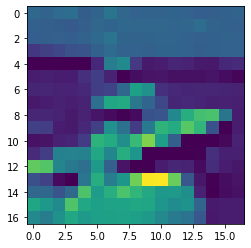

pooled output size :  (8, 8)
pooled output : 
[[ 381.  394.  420.  420.  361.  361.  388.  349.]
 [ 334.  345.  461.  517.  357.  357.  343.  346.]
 [ 115.  153.  461.  620.  620.  149.  116.  131.]
 [ 117.  125.  652.  665.  620.  677.  777.  777.]
 [ 205.  193.  706.  733.  881.  807.  807.  777.]
 [ 826.  497.  706.  733.  881.  607.  145.  145.]
 [ 826.  785.  785.  854. 1090. 1090.  543.  141.]
 [ 647.  790.  785.  780.  716.  585.  562.   89.]]


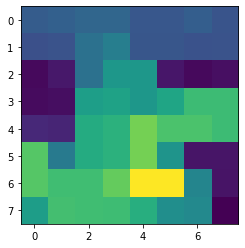

In [11]:
print("input activation map size: ", output3.shape)
print("input activation map: ")
print(output3)
plt.imshow(output3)
plt.show()
pool_size = np.array([3,3])
pool_stride = np.array([2,2])
pooled_output3 = hw3q2Pooling(output3, 'maximum', pool_size, pool_stride)
#print(pooled_output3.astype(int))
print("pooled output size : ", pooled_output3.shape)
print("pooled output : ")
print(pooled_output3)
plt.imshow(pooled_output3)
plt.show()

#### (3) Convolution layer function

In [12]:
def hw3q3RandomKernels(num_kernels, kernel_size):
    kernels = list()
    for m in range(num_kernels):
        kernels.append(np.random.randn(kernel_size[0], kernel_size[1], kernel_size[2]))
    return np.array(kernels)

def hw3q3ConvolutionLayer(img, kernels, stride, padding, nl_func, alpha=0):
    width = img.shape[0]
    height = img.shape[1]
    channel = img.shape[2]
    stride_width = stride[0]
    stride_height = stride[1]
    padding_width = padding[0]
    padding_height = padding[1]
    kernel_width = kernels.shape[1]
    kernel_height = kernels.shape[2]
    output = np.zeros((int((width - kernel_width + padding_width + stride_width)/stride_width), int((height - kernel_height + padding_height + stride_height)/stride_height), kernels.shape[0]), float)
    for m in range(kernels.shape[0]):
        #print("kernel : ", kernels[m])
        output_temp = hw3q1Convolution(img, kernels[m], stride, padding, nl_func, alpha)
        #plt.imshow(output_temp)
        #plt.show()
        for i in range(output.shape[0]):
            for j in range(output.shape[1]):
                output[i][j][m] = output_temp[i][j]
    return output

original image size :  (32, 32, 3)
original image


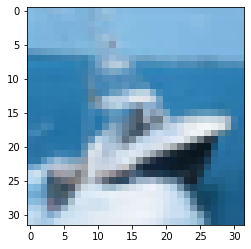

Filter kernels size :  (4, 3, 3, 3)
Filter kernels: 
[[[[ 0.34762546 -0.63578238  0.70052593]
   [ 1.35249281  1.21475081  0.34879362]
   [ 0.38522563 -0.20657924 -0.11588953]]

  [[-0.0477904  -0.53106762 -1.0911135 ]
   [ 0.32917486 -1.27958523  0.91442804]
   [-0.26155659  1.5961305  -0.41235722]]

  [[ 0.09930111 -0.53076947  0.99030309]
   [ 1.03905318  0.68693421 -1.41771205]
   [ 0.46501109 -1.00308431  1.24300663]]]


 [[[-0.41863428  1.01930911  0.59741944]
   [-0.85070176  1.17644501 -0.36119757]
   [ 1.07535157  0.79368638  0.96875011]]

  [[ 0.73970743 -0.31213872 -0.71384926]
   [-1.77516159 -0.02874201  0.74585519]
   [-0.98405977 -0.29596881  0.14362319]]

  [[-2.29252786 -1.51234783  1.6518586 ]
   [ 1.41835485  1.54742223 -0.06267302]
   [ 1.03782088 -0.61833562  0.85366043]]]


 [[[ 1.59250676 -0.12470095  0.78867609]
   [-0.33456184 -0.50011317  0.18648837]
   [ 0.15754717  0.71347277  0.5117275 ]]

  [[-1.17290516 -1.52236532 -0.06326159]
   [-1.87864706 -1.26006295

In [13]:
print("original image size : ", image.shape)
print("original image")
plt.imshow(image)
plt.show()

kernels = hw3q3RandomKernels(4, np.append(np.array([3,3]), image.shape[2]))
print("Filter kernels size : ", kernels.shape)
print("Filter kernels: ")
print(kernels)

layer_stride = np.array([2,2])
layer_padding = np.array([4,4])

layer_output = hw3q3ConvolutionLayer(image, kernels, layer_stride, layer_padding, 'ReLU')
print("Convolved strided Layer output size : ", layer_output.shape)
print("Convolved strided Layer output : ")
print(layer_output)

#### (4) Pooling Layer Function

In [14]:
def hw3q4PoolingLayer(activation_map, pool_func, pool_layer_size, pool_layer_stride):
    width = activation_map.shape[0]
    height = activation_map.shape[1]
    M = activation_map.shape[2]
    pool_layer_width = pool_layer_size[0]
    pool_layer_height = pool_layer_size[1]
    pool_layer_stride_width = pool_layer_stride[0]
    pool_layer_stride_height = pool_layer_stride[1]
    Y = np.zeros((int((width - pool_layer_width + pool_layer_stride_width)/pool_layer_stride_width), int((height - pool_layer_height + pool_layer_stride_height)/pool_layer_stride_height), M), float)
    for m in range(M):
        y = hw3q2Pooling(activation_map[:,:,m], pool_func,pool_layer_size, pool_layer_stride)
        for i in range(Y.shape[0]):
            for j in range(Y.shape[1]):
                Y[i][j][m] = y[i][j]
    return Y

In [15]:
print("input activation map volume : ", layer_output.shape)
print("input activation map volume : ")
print(layer_output)
pool_layer_size = np.array([5,5])
pool_layer_stride = np.array([2,2])
pooled_layer_output = hw3q4PoolingLayer(layer_output, 'maximum',pool_layer_size, pool_layer_stride)
#print(pooled_output3.astype(int))
print("pooled output Volume size : ", pooled_layer_output.shape)
print("pooled output Volume: ")
print(pooled_layer_output)

input activation map volume :  (17, 17, 4)
input activation map volume : 
[[[ 606.  904.    0.    0.]
  [ 607.  915.    0.    0.]
  [ 597.  889.    0.    0.]
  ...
  [ 591.  915.    0.    0.]
  [ 589.  909.    0.    0.]
  [ 593.  909.    0.    0.]]

 [[ 595.  902.    0.    0.]
  [ 595.  909.    0.    0.]
  [ 601.  881.    0.    0.]
  ...
  [ 591.  907.    0.    0.]
  [ 582.  906.    0.    0.]
  [ 583.  902.    0.    0.]]

 [[ 579.  918.    0.    0.]
  [ 582.  911.    0.    0.]
  [ 590.  920.    0.    0.]
  ...
  [ 593.  915.    0.    0.]
  [ 590.  912.    0.    0.]
  [ 586.  910.    0.    0.]]

 ...

 [[ 622.  944.    0.    0.]
  [ 638. 1006.    0.    0.]
  [ 496.  658.    0.    0.]
  ...
  [ 122.  502.    0.    0.]
  [ 168.  606.    0.    0.]
  [ 186.  634.    0.    0.]]

 [[ 762.  907.    0.    0.]
  [ 758.  915.    0.    0.]
  [ 685.  865.    0.    0.]
  ...
  [ 123.  558.    0.    0.]
  [ 168.  602.    0.    0.]
  [ 195.  629.    0.    0.]]

 [[ 820.  889.    0.    0.]
  [ 808.  97

#### (5) Flattening (unraveling) Function

In [16]:
def hw3q5Flattening(pooled_volume, flattening_matrix):
    array1d = list()
    for i in range(pooled_volume.shape[0]):
        for j in range(pooled_volume.shape[1]):
            for m in range(pooled_volume.shape[2]):
                array1d.append(pooled_volume[i][j][m])
    array1d = np.array(array1d)
    output = np.matmul(flattening_matrix, array1d)
    return output

In [17]:
print("input pooled volume size : ", pooled_layer_output.shape)
print("input pooled volume : ")
print(pooled_layer_output)
flattening_vector_size = 30
flattening_matrix = np.random.randn(flattening_vector_size, pooled_layer_output.shape[0]*pooled_layer_output.shape[1]*pooled_layer_output.shape[2])
flattened_array = hw3q5Flattening(pooled_layer_output, flattening_matrix)
print("Flattened array size : ", flattened_array.shape)
print("Flattened array : ")
print(flattened_array)

input pooled volume size :  (7, 7, 4)
input pooled volume : 
[[[ 625.  931.    0.    0.]
  [ 668.  931.    0.    0.]
  [ 734.  939.    0.    0.]
  [ 734.  939.    0.    0.]
  [ 619.  939.    0.    0.]
  [ 616.  933.    0.    0.]
  [ 616.  933.    0.    0.]]

 [[ 590.  920.    0.    0.]
  [ 668.  920.    0.    0.]
  [ 734.  972.    0.    0.]
  [ 734.  995.    0.    0.]
  [ 659.  995.    0.    0.]
  [ 612.  963.    0.    0.]
  [ 608.  926.    0.    0.]]

 [[ 383.  869.    0.    0.]
  [ 617.  861.    0.    0.]
  [ 734.  972.    0.    0.]
  [ 734.  995.    0.    0.]
  [ 686.  995.    0.    0.]
  [ 680.  990.    0.    0.]
  [ 680.  990.    0.    0.]]

 [[ 314.  806.    0.    0.]
  [ 743.  830.    0.    0.]
  [ 773.  972.    0.    0.]
  [ 849.  995.    0.    0.]
  [ 871.  995.    0.    0.]
  [ 896.  990.    0.    0.]
  [ 896.  990.    0.    0.]]

 [[ 669.  949.    0.    0.]
  [ 821.  938.    0.    0.]
  [ 821.  874.    0.    0.]
  [ 849.  874.    0.    0.]
  [ 871.  965.    0.    0.]
  [ 896

#### (6) Multilayer Perceptron (MLP) function (Fully Connected)

In [18]:
def RandomMatrices(flattened_vector_size, num_hidden_layer, hidden_layer_sizes, output_layer_size):
    hidden_layer_matrices = list()
    hidden_layer_matrices.append(np.random.randn(flattened_vector_size, hidden_layer_sizes[0]))
    for t in range(num_hidden_layer):
        if t == (num_hidden_layer - 1):
            hidden_layer_matrices.append(np.random.randn(hidden_layer_sizes[t], output_layer_size))
        else:
            hidden_layer_matrices.append(np.random.randn(hidden_layer_sizes[t], hidden_layer_sizes[t+1]))
    return hidden_layer_matrices

def hw3q6MLP(input_vector, hidden_layer_matrices, nl_func, softmax_flag, alpha = 0):
    for i in range(len(hidden_layer_matrices)):
        if i == 0:
            output = np.matmul(np.array([input_vector]), hidden_layer_matrices[i])
        else:
            output = np.matmul(output, hidden_layer_matrices[i])
        for j in range(output.shape[0]):
            for k in range(output.shape[1]):
                if nl_func == 'sigmoid':
                    output[j][k] = sigmoid(output[j][k])
                elif nl_func == 'tanh':
                    output[j][k] = tanh(output[j][k])
                elif nl_func == 'ReLU':
                    output[j][k] = ReLU(output[j][k])
                elif nl_func == 'PReLU':
                    output[j][k] = leakyrelu(output[j][k], alpha)
    sum = 0
    if softmax_flag:
        for i in range(output.shape[0]):
            for j in range(output.shape[1]):
                sum = sum + np.exp(output[i][j])
        for i in range(output.shape[0]):
            for j in range(output.shape[1]):
                output[i][j] = (np.exp(output[i][j])/sum)
    return output[0]

input vector size :  (30,)
input vector : 
[ -4939.58842408   4480.25438001 -14146.38624467  -1287.63587116
  -2029.11743798 -13144.63692357  -2019.55307861 -10802.00315398
  -4111.21752875  -7375.47097531  -6801.41627977  -6030.63499369
  -2723.68042767   2499.76733277  -1199.39069689  -3979.44290868
  19253.01158286  -5050.26052141   6307.08727774   2563.92809285
  -7867.50280699  13358.94431855    777.03763795   8035.30857473
  12126.76131578  -7486.86901914  11849.59122113   4690.76251799
  -8388.44329676   -527.75459081]
MLP Output with softmax : 
[0.10078878 0.13329299 0.10451546 0.06634696 0.12803039 0.10310996
 0.08700555 0.08607566 0.08031898 0.11051526]


C:\Users\sanyo\AppData\Local\Temp/ipykernel_12244/426153895.py:35: RuntimeWarning: overflow encountered in exp
  sig = (1.0/(1+np.exp(-z)))


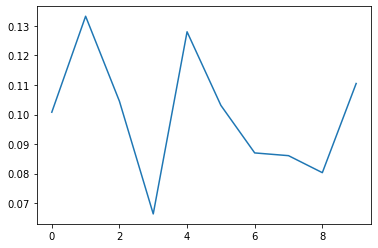

MLP Output without softmax : 
[0.58214803 0.86167063 0.61845601 0.16401888 0.8213886  0.604917
 0.43509288 0.42434764 0.35512694 0.67427458]


C:\Users\sanyo\AppData\Local\Temp/ipykernel_12244/426153895.py:35: RuntimeWarning: overflow encountered in exp
  sig = (1.0/(1+np.exp(-z)))


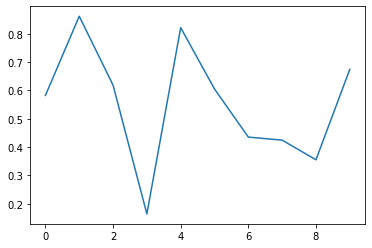

In [19]:
print("input vector size : ", flattened_array.shape)
print("input vector : ")
print(flattened_array)
#print()
num_hidden_layer = 2
hidden_layer_sizes = np.array([3,4])
output_layer_size = 10

hidden_layer_matrices = RandomMatrices(flattened_array.shape[0], num_hidden_layer, hidden_layer_sizes, output_layer_size)

#if leakyReLU is used please pass alpha in the function
MLP_output_with_softmax = hw3q6MLP(flattened_array, hidden_layer_matrices, 'sigmoid', True)
print("MLP Output with softmax : ")
print(MLP_output_with_softmax)
plt.plot(MLP_output_with_softmax)
plt.show()

MLP_output_without_softmax = hw3q6MLP(flattened_array, hidden_layer_matrices, 'sigmoid', False)
print("MLP Output without softmax : ")
print(MLP_output_without_softmax)
plt.plot(MLP_output_without_softmax)
plt.show()

#### (7) Feed-forward path

In [20]:
def hw3q7MultiLayerKernels(image, num_kernels_array, kernels_size_array, layer_padding, stride_array, pool_layer_size_array, pool_stride_array):
    kernels_array = list()
    final_pooled_output_size = list()
    for i in range(num_kernels_array.shape[0]):
        if i == 0:
            kernels = hw3q3RandomKernels(num_kernels_array[i], np.append(kernels_size_array[i], image.shape[2]))
            temp_width = int((image.shape[0] - kernels_size_array[i][0] + layer_padding[i][0] + stride_array[i][0])/stride_array[i][0])
            temp_height = int((image.shape[1] - kernels_size_array[i][1] + layer_padding[i][1] + stride_array[i][1])/stride_array[i][1])
        else:
            kernels = hw3q3RandomKernels(num_kernels_array[i], np.append(kernels_size_array[i], num_kernels_array[i-1]))
            temp_width = int((layer_pooled_output_width - kernels_size_array[i][0] + layer_padding[i][0] + stride_array[i][0])/stride_array[i][0])
            temp_height = int((layer_pooled_output_height - kernels_size_array[i][1] + layer_padding[i][1] + stride_array[i][1])/stride_array[i][1])
        kernels_array.append(kernels)
        layer_pooled_output_width = int((temp_width - pool_layer_size_array[i][0] + pool_stride_array[i][0])/pool_stride_array[i][0])
        layer_pooled_output_height = int((temp_width - pool_layer_size_array[i][1] + pool_stride_array[i][1])/pool_stride_array[i][1])
    final_pooled_output_size.append(layer_pooled_output_width)
    final_pooled_output_size.append(layer_pooled_output_height)
    final_pooled_output_size.append(num_kernels_array[-1])
    return kernels_array, final_pooled_output_size
        
def hw3q7FeedForwardPath(img, num_kernels_array, kernels_array, layer_padding, stride_array, pool_layer_size_array, pool_stride_array, flattening_matrix, hidden_layer_matrices, pool_func, nl_func, softmax_flag):
    pooled_output = img
    for i in range(num_kernels_array.shape[0]):
        conv_output = hw3q3ConvolutionLayer(pooled_output, kernels_array[i], stride_array[i], layer_padding[i], nl_func)
        pooled_output = hw3q4PoolingLayer(conv_output, pool_func, pool_layer_size_array[i], pool_stride_array[i])
    flattened_output = hw3q5Flattening(pooled_output, flattening_matrix)
    MLP_output = hw3q6MLP(flattened_output, hidden_layer_matrices, nl_func, softmax_flag)
    return MLP_output

C:\Users\sanyo\AppData\Local\Temp/ipykernel_12244/426153895.py:35: RuntimeWarning: overflow encountered in exp
  sig = (1.0/(1+np.exp(-z)))


value of C2 is equal to the number of kernels in the previous convolution layer - 16
original input image size :  (32, 32, 3)
original image


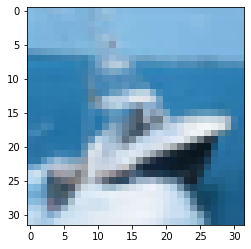

Ouput vector size :  (10,)
[0.06774289 0.07178687 0.07590387 0.16958957 0.08267311 0.09339018
 0.06943957 0.14930831 0.08805925 0.13210637]


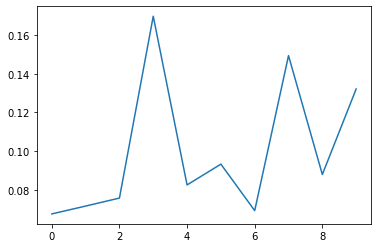

In [21]:
num_kernels_array = np.array([16, 8])
kernels_size_array = np.array([[3,3], [3,3]])
layer_padding = np.array([[0, 0], [0,0]])
stride_array = np.array([[1,1], [1,1]])
pool_layer_size_array = np.array([[2,2], [2,2]])
pool_stride_array = np.array([[2,2], [2,2]])
flattening_vector_size = 40
num_hidden_layer = 1
hidden_layer_sizes = np.array([8])
output_layer_size = 10
softmax_flag = True
nl_func = 'sigmoid'
pool_func = 'maximum'

kernels_array, final_pooled_output_size = hw3q7MultiLayerKernels(image, num_kernels_array, kernels_size_array, layer_padding, stride_array, pool_layer_size_array, pool_stride_array)

hidden_layer_matrices = RandomMatrices(flattening_vector_size, num_hidden_layer, hidden_layer_sizes, output_layer_size)

flattening_matrix = np.random.randn(flattening_vector_size, final_pooled_output_size[0]*final_pooled_output_size[1]*final_pooled_output_size[2])

output_vector = hw3q7FeedForwardPath(image, num_kernels_array, kernels_array, layer_padding, stride_array, pool_layer_size_array, pool_stride_array, flattening_matrix, hidden_layer_matrices, pool_func, nl_func, softmax_flag)

print("value of C2 is equal to the number of kernels in the previous convolution layer - 16")
print("original input image size : ", image.shape)
print("original image")
plt.imshow(image)
plt.show()
print("Ouput vector size : ", output_vector.shape)
print(output_vector)
plt.plot(output_vector)
plt.show()

#### (8) (a)

Input image size :  (32, 32, 3)
Input image : 


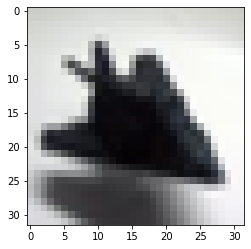

C:\Users\sanyo\AppData\Local\Temp/ipykernel_12244/426153895.py:35: RuntimeWarning: overflow encountered in exp
  sig = (1.0/(1+np.exp(-z)))


Output size :  (10,)
[0.06798876 0.07632196 0.08896801 0.16038593 0.0764903  0.11232667
 0.06890104 0.12937419 0.12543846 0.09380468]
Input image size :  (32, 32, 3)
Input image : 


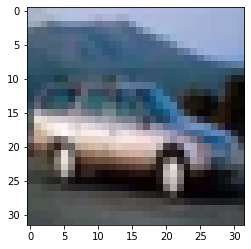

Output size :  (10,)
[0.06799767 0.0762764  0.08880114 0.16053318 0.07655884 0.11213909
 0.06892331 0.12961761 0.12502746 0.09412528]
Input image size :  (32, 32, 3)
Input image : 


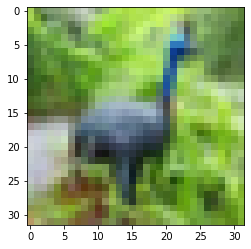

Output size :  (10,)
[0.06798877 0.07632198 0.08896793 0.16038599 0.07649033 0.11232663
 0.06890106 0.12937424 0.1254384  0.09380466]
Input image size :  (32, 32, 3)
Input image : 


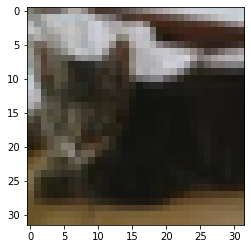

Output size :  (10,)
[0.06798876 0.07632196 0.08896801 0.16038593 0.0764903  0.11232667
 0.06890104 0.12937419 0.12543846 0.09380468]
Input image size :  (32, 32, 3)
Input image : 


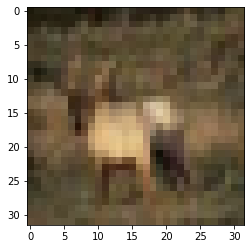

Output size :  (10,)
[0.06798876 0.07632195 0.08896801 0.16038594 0.0764903  0.11232667
 0.06890104 0.12937419 0.12543846 0.09380468]
Input image size :  (32, 32, 3)
Input image : 


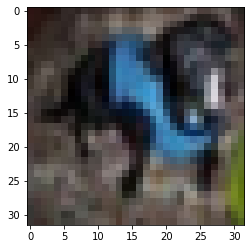

Output size :  (10,)
[0.06798876 0.07632196 0.08896801 0.16038593 0.0764903  0.11232667
 0.06890104 0.12937419 0.12543846 0.09380468]
Input image size :  (32, 32, 3)
Input image : 


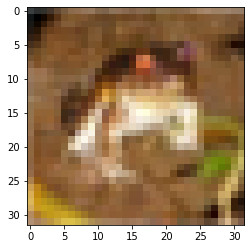

Output size :  (10,)
[0.06798876 0.07632195 0.08896801 0.16038594 0.0764903  0.11232667
 0.06890104 0.12937419 0.12543846 0.09380468]
Input image size :  (32, 32, 3)
Input image : 


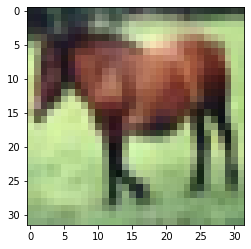

Output size :  (10,)
[0.06798876 0.07632196 0.08896801 0.16038593 0.0764903  0.11232667
 0.06890104 0.12937419 0.12543846 0.09380468]
Input image size :  (32, 32, 3)
Input image : 


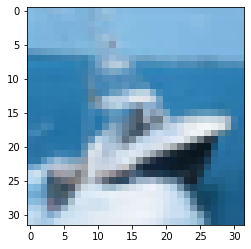

Output size :  (10,)
[0.06774289 0.07178687 0.07590387 0.16958957 0.08267311 0.09339018
 0.06943957 0.14930831 0.08805925 0.13210637]
Input image size :  (32, 32, 3)
Input image : 


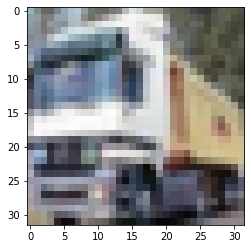

Output size :  (10,)
[0.0679889  0.07632124 0.08896537 0.16038826 0.07649138 0.11232371
 0.0689014  0.12937804 0.12543198 0.09380972]


In [22]:
inputs = list()
for i in range(0,10):
    dictionary = unpickle('cifar-10-batches-py\data_batch_1')
    k = dictionary[b'labels'].index(i)
    image = ImageMatrix(dictionary, k)
    inputs.append(image)

outputs = list()
for i in range(10):
    print("Input image size : ", inputs[i].shape)
    print("Input image : ")
    plt.imshow(inputs[i])
    plt.show()
    
    output_vector = hw3q7FeedForwardPath(inputs[i], num_kernels_array, kernels_array, layer_padding, stride_array, pool_layer_size_array, pool_stride_array, flattening_matrix, hidden_layer_matrices, pool_func, nl_func, softmax_flag)
    outputs.append(output_vector)
    print("Output size : ", output_vector.shape)
    print(output_vector)

#### (b)

In [23]:
def hw3q8BottleneckOutput(img, num_kernels_array, kernels_array, layer_padding, stride_array, pool_layer_size_array, pool_stride_array, flattening_matrix, pool_func, nl_func):
    pooled_output = img
    for i in range(num_kernels_array.shape[0]):
        conv_output = hw3q3ConvolutionLayer(pooled_output, kernels_array[i], stride_array[i], layer_padding[i], nl_func)
        pooled_output = hw3q4PoolingLayer(conv_output, pool_func, pool_layer_size_array[i], pool_stride_array[i])
    flattened_output = hw3q5Flattening(pooled_output, flattening_matrix)
    return flattened_output

flattened_outputs = list()
inputs = list()
for i in range(0,10):
    dictionary = unpickle('cifar-10-batches-py\data_batch_1')
    indices = np.where(np.array(dictionary[b'labels']) == i)[0]
    inputs_temp = list()
    for j in range(3):
        image = ImageMatrix(dictionary, indices[j])
        inputs_temp.append(image)
    inputs.append(inputs_temp)

for i in range(0,10):
    for j in range(3):
        #print("Input image size : ", inputs[i][j].shape)
        #print("Input image : ")
        #plt.imshow(inputs[i][j])
        #plt.show()
        flattened_output = hw3q8BottleneckOutput(inputs[i][j], num_kernels_array, kernels_array, layer_padding, stride_array, pool_layer_size_array, pool_stride_array, flattening_matrix, pool_func, nl_func)
        flattened_outputs.append(flattened_output)
print(np.array(flattened_outputs).shape)
print(np.array(flattened_outputs)[0].shape)
"""
tsne =  TSNE(n_components=2, learning_rate='auto', init='random')
Y_output = tsne.fit_transform(np.array(flattened_outputs))
colors = ['black', 'blue', 'green', 'red', 'yellow', 'purple', 'brown', 'magenta', 'cyan', 'orange']
for i in range(10):
    plt.scatter(Y_output[i*3:i*3+3, 0], Y_output[i*3:i*3+3, 1], c = colors[i], label = i)
#plt.scatter(x_axis, y_axis)
plt.legend()
plt.show()
"""

C:\Users\sanyo\AppData\Local\Temp/ipykernel_12244/426153895.py:35: RuntimeWarning: overflow encountered in exp
  sig = (1.0/(1+np.exp(-z)))


(30, 40)
(40,)


"\ntsne =  TSNE(n_components=2, learning_rate='auto', init='random')\nY_output = tsne.fit_transform(np.array(flattened_outputs))\ncolors = ['black', 'blue', 'green', 'red', 'yellow', 'purple', 'brown', 'magenta', 'cyan', 'orange']\nfor i in range(10):\n    plt.scatter(Y_output[i*3:i*3+3, 0], Y_output[i*3:i*3+3, 1], c = colors[i], label = i)\n#plt.scatter(x_axis, y_axis)\nplt.legend()\nplt.show()\n"

In [ ]:
print("Ouptut from the inbuilt tSNE seems to be very scattered and there seems to be no separate classes visible from the plot")

In [4]:
print((13.0/100)*10)

1.3
